<a href="https://colab.research.google.com/github/AlecTraas/computational-geo-lab/blob/main/Colab/Kai/quickhull_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
def runProgram():
  num_points = 10

  points = np.random.rand(num_points,2)*10

  sort = sorted(points, key=lambda x: x[0])

  left = sort[0]
  right = sort[-1]

  hull_set = []
  hull_set = hull_set + [left, right]

  sort.pop(0)
  sort.pop(-1)

  parseSides = lambda l, r, ps: (
    np.array([p for p in ps if aboveLine(l, r, p)]),
    np.array([p for p in ps if not aboveLine(l, r, p)])
  )

  upper_set, lower_set = parseSides(left, right, sort)

  hull_set += list(quickHull(upper_set, left, right, 1))
  hull_set += list(quickHull(lower_set, left, right, -1))

  # Filter out rows with size 0 and convert to a NumPy array
  hull_set = np.vstack([arr for arr in hull_set if len(arr) > 0])

  plt.scatter(points[:, 0], points[:, 1])
  plt.scatter(hull_set[:, 0], hull_set[:, 1], color='red')

  return hull_set

In [70]:
def aboveLine(a,b,c):
  return (b[0] - a[0]) * (c[1] - a[1]) - (b[1] - a[1]) * (c[0] - a[0]) > 0

In [71]:
def furthestP(points,a,b):
  dist = 1/2 * np.abs(a[0]*(b[1] - points[:,1]) + b[0]*(points[:,1] - a[1]) + points[:,0]*(a[1] - b[1]))
  return points[np.argmax(dist)]

In [72]:
def quickHull(points,a,b,f):
  if points.size == 0 or a is None or b is None:
    return [[]]

  c = furthestP(points,a,b)

  hull_set = []
  hull_set = hull_set + [c]

  indices = np.where((points == c).all(axis=1))[0]
  points = np.delete(points, indices, axis=0)

  parseSides = lambda l, r, ps: (
    np.array([p for p in ps if aboveLine(l, r, p)]),
    np.array([p for p in ps if not aboveLine(l, r, p)])
  )

  set_1a, set_1b = parseSides(a,c,points)
  set_2b, set_2a = parseSides(b,c,points)

  if f == 1:
    hull_set = hull_set + quickHull(set_1a, a, c, 1)
    hull_set = hull_set + quickHull(set_2a, c, b, 1)

  else:
    hull_set = hull_set + quickHull(set_1b, a, c, -1)
    hull_set = hull_set + quickHull(set_2b, c, b, -1)

  return hull_set

array([[0.6783554 , 0.59652114],
       [8.11522123, 7.41909195],
       [3.73473414, 9.80454887],
       [6.13781308, 9.94680883],
       [6.46274078, 2.06471336],
       [7.92530962, 4.93305586]])

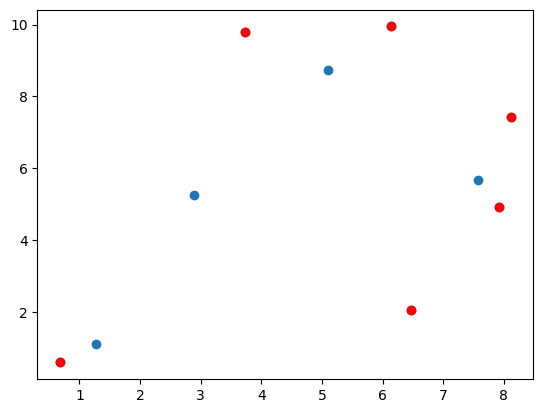

In [73]:
runProgram()